In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [40]:
url = "https://raw.githubusercontent.com/oribachar13579/oriandyuval/main/1.08_Crash_Data_Report_(detail).csv"
strike_df = pd.read_csv(url)
strike_df.head()

,X,Y,OBJECTID,Incidentid,DateTime,Year,StreetName,CrossStreet,Distance,JunctionRelation,...,Unittype_Two,Age_Drv2,Gender_Drv2,Traveldirection_Two,Unitaction_Two,Violation1_Drv2,AlcoholUse_Drv2,DrugUse_Drv2,Latitude,Longitude
0,-111.95221,33.42191,1,2598369,2012/01/01 07:25:00+00,2012,University Dr,Hardy Dr,0.000,Intersection Non Interchange,...,Driver,20.0,Female,East,Going Straight Ahead,No Improper Action,No Apparent Influence,No Apparent Influence,33.42191,-111.95221
1,-111.93769,33.42319,2,2593420,2012/01/01 11:45:00+00,2012,7th St,Myrtle Ave,139.920,Not Junction Related,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33.42319,-111.93769
2,-111.89196,33.41842,3,2588493,2012/01/01 18:07:00+00,2012,Price Rd,Orange St,0.000,Intersection Interchange,...,Driver,31.0,Male,South,Going Straight Ahead,No Improper Action,No Apparent Influence,No Apparent Influence,33.41842,-111.89196
3,-111.94791,33.41779,4,2584449,2012/01/02 00:03:00+00,2012,11th St,Judd St,200.112,Not Junction Related,...,Driverless,NaN,NaN,East,Properly Parked,NaN,NaN,NaN,33.41779,-111.94791
4,-111.92847,33.34956,5,2592211,2012/01/02 00:12:00+00,2012,Rural Rd,Elliot Rd,135.168,Intersection Related Non Interchange,...,Driver,20.0,Female,South,Going Straight Ahead,No Improper Action,No Apparent Influence,No Apparent Influence,33.34956,-111.92847


In [41]:
strike_df.shape

(51407, 35)

In [42]:
strike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51407 entries, 0 to 51406
Data columns (total 35 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   X                    51081 non-null  float64
 1   Y                    51081 non-null  float64
 2   OBJECTID             51407 non-null  int64  
 3   Incidentid           51407 non-null  int64  
 4   DateTime             51407 non-null  object 
 5   Year                 51407 non-null  int64  
 6   StreetName           51201 non-null  object 
 7   CrossStreet          50744 non-null  object 
 8   Distance             51406 non-null  float64
 9   JunctionRelation     51406 non-null  object 
 10  Totalinjuries        51406 non-null  float64
 11  Totalfatalities      51406 non-null  float64
 12  Injuryseverity       51406 non-null  object 
 13  Collisionmanner      51406 non-null  object 
 14  Lightcondition       51406 non-null  object 
 15  Weather              51406 non-null 

In [43]:
strike_df.columns

Index(['X', 'Y', 'OBJECTID', 'Incidentid', 'DateTime', 'Year', 'StreetName',
       'CrossStreet', 'Distance', 'JunctionRelation', 'Totalinjuries',
       'Totalfatalities', 'Injuryseverity', 'Collisionmanner',
       'Lightcondition', 'Weather', 'SurfaceCondition', 'Unittype_One',
       'Age_Drv1', 'Gender_Drv1', 'Traveldirection_One', 'Unitaction_One',
       'Violation1_Drv1', 'AlcoholUse_Drv1', 'DrugUse_Drv1', 'Unittype_Two',
       'Age_Drv2', 'Gender_Drv2', 'Traveldirection_Two', 'Unitaction_Two',
       'Violation1_Drv2', 'AlcoholUse_Drv2', 'DrugUse_Drv2', 'Latitude',
       'Longitude'],
      dtype='object')

In [44]:
strike_df["Year"].unique()


array([2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022,
       2023, 2024], dtype=int64)

In [45]:
strike_df.tail()

,X,Y,OBJECTID,Incidentid,DateTime,Year,StreetName,CrossStreet,Distance,JunctionRelation,...,Unittype_Two,Age_Drv2,Gender_Drv2,Traveldirection_Two,Unitaction_Two,Violation1_Drv2,AlcoholUse_Drv2,DrugUse_Drv2,Latitude,Longitude
51402,-111.926385,33.435558,51403,4155884,2024/03/14 13:15:00+00,2024,SR-202 Exit 7 T-Ramp,NaN,0.0,Not Junction Related,...,Driver,22.0,Female,East,Stopped In Trafficway,No Improper Action,No Apparent Influence,No Apparent Influence,33.435558,-111.926385
51403,-111.926404,33.435576,51404,4155885,2024/03/14 13:20:00+00,2024,SR-202 Exit 7 T-Ramp,NaN,0.0,Entrance Exit Ramp 205,...,Driver,25.0,Female,West,Making Right Turn,No Improper Action,No Apparent Influence,No Apparent Influence,33.435576,-111.926404
51404,-111.909869,33.436621,51405,4155890,2024/03/15 07:11:00+00,2024,SR-202 Exit 8 J-Ramp,NaN,0.0,Entrance Exit Ramp 205,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33.436621,-111.909869
51405,-111.939524,33.386046,51406,4155893,2024/03/09 07:44:00+00,2024,US-60 Exit 173 J-Ramp,NaN,0.0,Entrance Exit Ramp 205,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33.386046,-111.939524
51406,-111.968688,33.405953,51407,4156010,2024/03/08 19:59:00+00,2024,I-10 Exit 153 C2-Ramp,NaN,0.0,Not Junction Related,...,Driver,58.0,Male,West,Going Straight Ahead,No Improper Action,No Apparent Influence,No Apparent Influence,33.405953,-111.968688


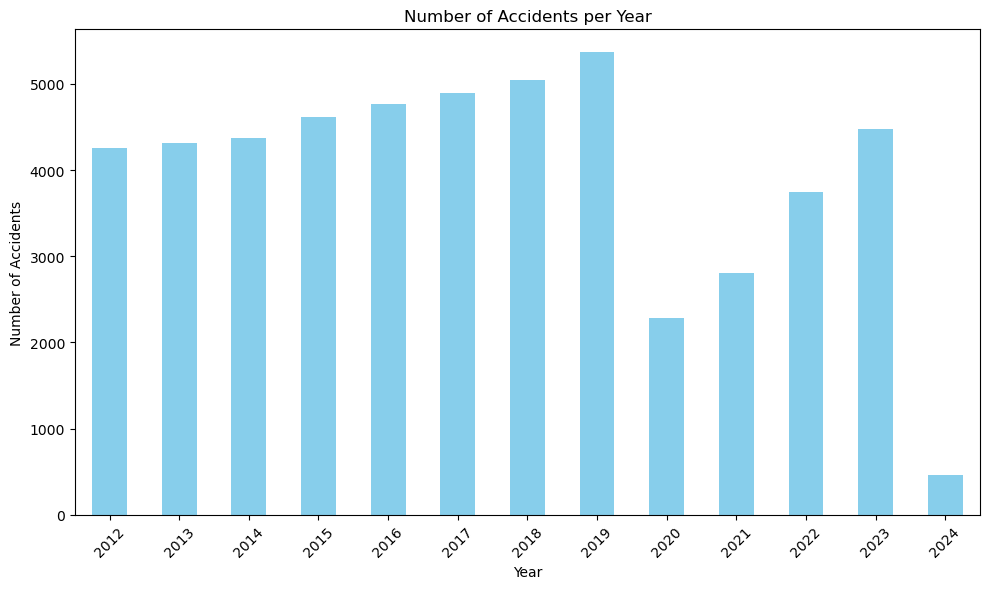

In [46]:
# Plot 1: Number of accidents per year
accidents_by_year = strike_df['Year'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
accidents_by_year.plot(kind='bar', color='skyblue')
plt.title('Number of Accidents per Year')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('accidents_per_year.png')


In [51]:
med_df= strike_df.groupby('Year')['OBJECTID'].count()
med_df

Year
2012    4258
2013    4316
2014    4372
2015    4612
2016    4768
2017    4896
2018    5049
2019    5366
2020    2280
2021    2805
2022    3745
2023    4480
2024     460
Name: OBJECTID, dtype: int64

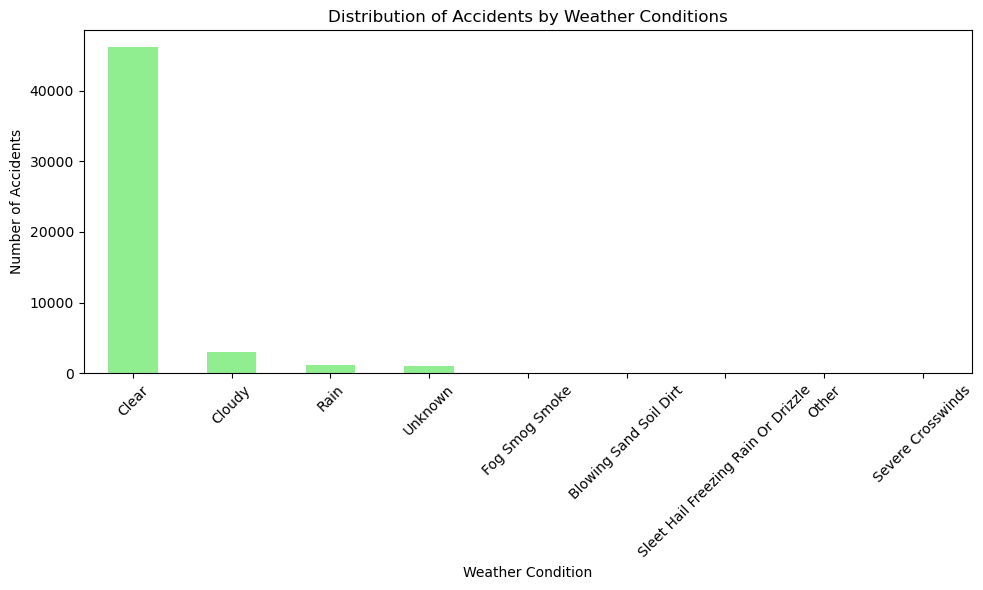

In [52]:
accidents_by_weather = strike_df['Weather'].value_counts()
plt.figure(figsize=(10, 6))
accidents_by_weather.plot(kind='bar', color='lightgreen')
plt.title('Distribution of Accidents by Weather Conditions')
plt.xlabel('Weather Condition')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('accidents_by_weather.png')